In [75]:
import os
import json
import numpy as np
from collections import defaultdict
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset #load_dataset from Huggingface
from scipy import stats
from scipy.stats import rankdata, spearmanr


In [83]:
def load_tsne_embedding(lang, choice, path, layer):
    file_path = f'{path}/TSNE_{lang}choice{choice}_lasttoken_layer{layer}.json'
    # Load the t-SNE results from JSON
    with open(file_path, "r") as f:
        tsne_results = json.load(f)
    return tsne_results


In [88]:
lang_list = ['spanish', 'chinese', 'burmese']

path = '../../alignment_outputs/Llama3.1/tsne_xstorycloze'

layer = [0]
tsne_dict_choice1 = defaultdict(dict)
tsne_dict_choice2 = defaultdict(dict)
for lang in lang_list:
    for item in layer:
        tsne_dict_choice1[lang][item] = load_tsne_embedding(lang,1, path, item)
        tsne_dict_choice2[lang][item] = load_tsne_embedding(lang,2, path, item)


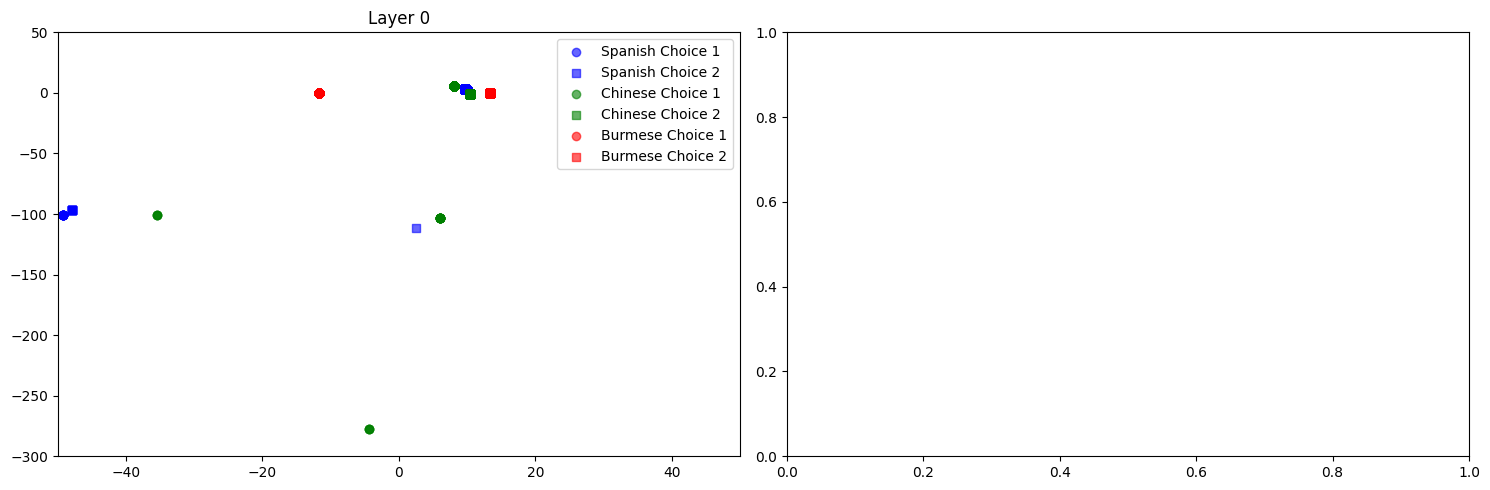

In [89]:
# Scatter plot for the first 5 samples of tsne_dict_choice1 and tsne_dict_choice2 for English and Spanish with annotations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

markers = {'Choice 1': 'o', 'Choice 2': 's'}
colors = {'spanish': 'blue', 'chinese': 'green', 'burmese': 'red'}

for j, item in enumerate(layer):
    ax = axes[j]
    for lang in lang_list:
        tsne_choice1 = np.array(list(tsne_dict_choice1[lang][item].values()))
        tsne_choice2 = np.array(list(tsne_dict_choice2[lang][item].values()))
        
        scatter1 = ax.scatter(tsne_choice1[:, 0], tsne_choice1[:, 1], label=f'{lang.capitalize()} Choice 1', alpha=0.6, marker=markers['Choice 1'], color=colors[lang])
        scatter2 = ax.scatter(tsne_choice2[:, 0], tsne_choice2[:, 1], label=f'{lang.capitalize()} Choice 2', alpha=0.6, marker=markers['Choice 2'], color=colors[lang])
        ax.set_xlim(-50,50)
        ax.set_ylim(-300,50)
        
        
    ax.set_title(f'Layer {item}')
    ax.legend()

plt.tight_layout()
plt.show()

In [60]:
xstorycloze = load_dataset('juletxara/xstory_cloze', 'zh')
xstorycloze_answer = xstorycloze['eval']['answer_right_ending']
correct_choices = []
for i in range(len(xstorycloze_answer)):
    correct_choices.append(xstorycloze_answer[i])

print(correct_choices[0:100])


[2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2]


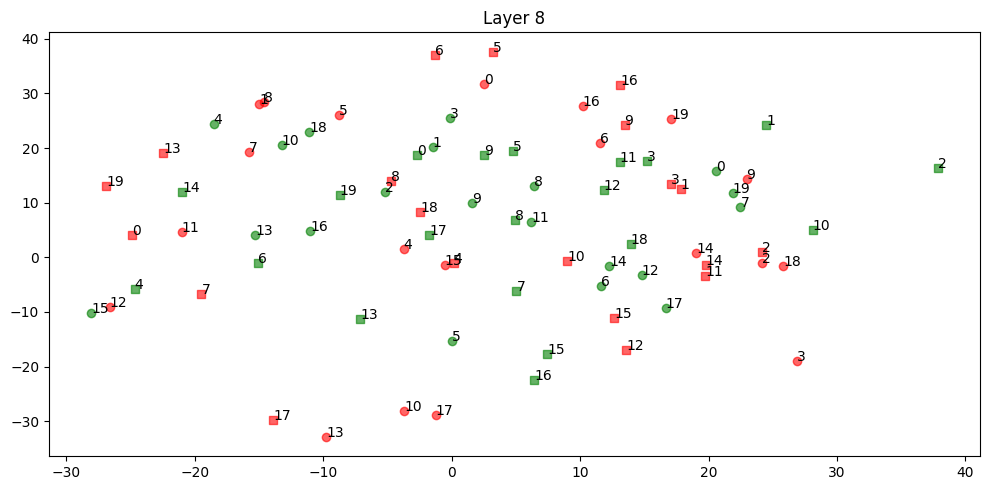

In [65]:
# Scatter plot for the first 100 samples of tsne_dict_choice1 and tsne_dict_choice2 for English and Spanish with annotations
fig, ax = plt.subplots(figsize=(10, 5))

markers = {'english': 'o', 'chinese': 's'}
highlight_colors = {1: 'red', 2: 'green'}

item = 8  # Layer 14

for lang in lang_list:
    tsne_choice1 = np.array(list(tsne_dict_choice1[lang][item].values()))
    tsne_choice2 = np.array(list(tsne_dict_choice2[lang][item].values()))
    
    for i in range(len(correct_choices[0:20])):
        correct_choice = correct_choices[i]
        incorrect_choice = 1 if correct_choice == 2 else 2
        
        ax.scatter(tsne_choice1[i, 0], tsne_choice1[i, 1], label=f'{lang.capitalize()} Choice 1' if i == 0 else "", alpha=0.6, marker=markers[lang], color=highlight_colors[incorrect_choice])
        ax.scatter(tsne_choice2[i, 0], tsne_choice2[i, 1], label=f'{lang.capitalize()} Choice 2' if i == 0 else "", alpha=0.6, marker=markers[lang], color=highlight_colors[correct_choice])
        ax.annotate(i, [tsne_choice1[i, 0], tsne_choice1[i, 1]])
        ax.annotate(i, [tsne_choice2[i, 0], tsne_choice2[i, 1]])

ax.set_title(f'Layer {item}')
#ax.legend()

plt.tight_layout()
plt.show()

In [66]:
lang_list = ['deu_Latn', 'eng_Latn']

path = '../../alignment_outputs/Llama3.1/tsne_belebele'

layer = [0,14]
tsne_dict_choice1 = defaultdict(dict)
tsne_dict_choice2 = defaultdict(dict)
tsne_dict_choice3 = defaultdict(dict)
tsne_dict_choice4 = defaultdict(dict)
for lang in lang_list:
    for item in layer:
        tsne_dict_choice1[lang][item] = load_tsne_embedding(lang,1, path, item)
        tsne_dict_choice2[lang][item] = load_tsne_embedding(lang,2, path, item)
        tsne_dict_choice3[lang][item] = load_tsne_embedding(lang,3, path, item)
        tsne_dict_choice4[lang][item] = load_tsne_embedding(lang,4, path, item)

In [67]:
xstorycloze = load_dataset('Kartik221/Belebele_test', 'eng_Latn')
xstorycloze_answer = xstorycloze['test']['correct_answer_num']
correct_choices = []
for i in range(len(xstorycloze_answer)):
    correct_choices.append(xstorycloze_answer[i])

print(correct_choices[0:100])


['1', '1', '2', '2', '3', '4', '3', '1', '3', '4', '2', '3', '3', '4', '2', '3', '2', '3', '1', '3', '1', '2', '2', '2', '3', '4', '3', '2', '2', '4', '2', '3', '2', '1', '3', '3', '2', '2', '1', '4', '3', '4', '2', '4', '3', '3', '1', '3', '2', '1', '3', '3', '2', '4', '1', '2', '4', '3', '3', '4', '1', '1', '4', '4', '1', '1', '2', '2', '3', '3', '4', '4', '4', '1', '1', '3', '2', '2', '1', '1', '3', '4', '4', '2', '1', '1', '4', '2', '1', '1', '3', '1', '3', '4', '3', '3', '1', '4', '2', '2']


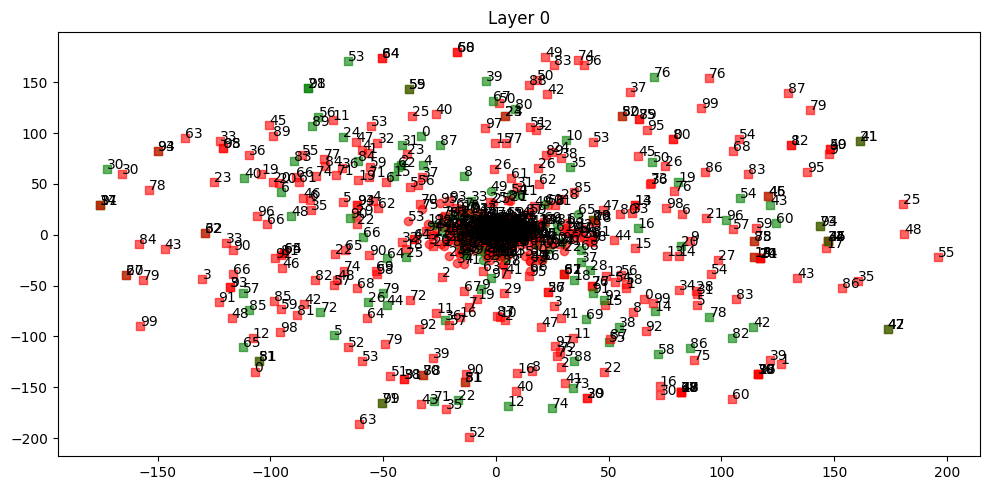

In [74]:
# Scatter plot for the first 100 samples of tsne_dict_choice1, tsne_dict_choice2, tsne_dict_choice3, and tsne_dict_choice4 for English and Chinese with annotations
fig, ax = plt.subplots(figsize=(10, 5))
lang_list = ['eng_Latn', 'deu_Latn']
markers = {'eng_Latn': 'o', 'deu_Latn': 's'}
highlight_colors = {1: 'red', 2: 'red', 3: 'red', 4: 'red'}

item = 0  # Layer 14

for lang in lang_list:
    
    tsne_choice1 = np.array(list(tsne_dict_choice1[lang][item].values()))
    tsne_choice2 = np.array(list(tsne_dict_choice2[lang][item].values()))
    tsne_choice3 = np.array(list(tsne_dict_choice3[lang][item].values()))
    tsne_choice4 = np.array(list(tsne_dict_choice4[lang][item].values()))
    
    for i in range(len(correct_choices[0:100])):
        correct_choice = int(correct_choices[i])
        highlight_colors[correct_choice] = 'green'
        
        ax.scatter(tsne_choice1[i, 0], tsne_choice1[i, 1], label=f'{lang.capitalize()} Choice 1' if i == 0 else "", alpha=0.6, marker=markers[lang], color=highlight_colors[1])
        ax.scatter(tsne_choice2[i, 0], tsne_choice2[i, 1], label=f'{lang.capitalize()} Choice 2' if i == 0 else "", alpha=0.6, marker=markers[lang], color=highlight_colors[2])
        ax.scatter(tsne_choice3[i, 0], tsne_choice3[i, 1], label=f'{lang.capitalize()} Choice 3' if i == 0 else "", alpha=0.6, marker=markers[lang], color=highlight_colors[3])
        ax.scatter(tsne_choice4[i, 0], tsne_choice4[i, 1], label=f'{lang.capitalize()} Choice 4' if i == 0 else "", alpha=0.6, marker=markers[lang], color=highlight_colors[4])
        
        ax.annotate(i, [tsne_choice1[i, 0], tsne_choice1[i, 1]])
        ax.annotate(i, [tsne_choice2[i, 0], tsne_choice2[i, 1]])
        ax.annotate(i, [tsne_choice3[i, 0], tsne_choice3[i, 1]])
        ax.annotate(i, [tsne_choice4[i, 0], tsne_choice4[i, 1]])
        
        highlight_colors[correct_choice] = 'red'  # Reset the correct choice color back to red for the next iteration

ax.set_title(f'Layer {item}')
#ax.legend()

plt.tight_layout()
plt.show()